In [11]:
from sklearn.cluster import KMeans  # Import Library yang akan digunakan untuk clustering
from openpyxl import load_workbook
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
wb = load_workbook(filename="siswa.xlsx") # Import data excel alumni kedalam python 
sheet_ranges = wb['Sheet1']

df=pd.DataFrame(sheet_ranges.values)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,No,No_Induk,Nama,jen_kel,alamat,Agama,Tgl_Lahir,Tmpt_Lahir,Nama_Wali,Pekerjaan Wali,Pend,Alamat_Wali,Thn_msk,Usia_msk,lulus,UAS,predikat,Pend_SebelumSD,None
1,1,2683,Ani Yuanita,P,Tegallayang,Islam,1993-11-03 00:00:00,Bantul,Sukarjo,Petani,SD,Tegallayang,2000,7,2007,17.9,Cukup,TK,None
2,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,1993-12-29 00:00:00,Bantul,Hadi Wardoyo,Petani,SMA,Tegallayang,2000,7,2007,16.9,Cukup,TK,None
3,3,2688,Heri Budiyanto,L,Tegallayang,Islam,1994-02-15 00:00:00,Bantul,Ribut,Petani,None,Tegallayang,2000,6,2007,20.15,Cukup,TK,None
4,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,1994-04-20 00:00:00,Bantul,FX Slamet Sudarsono,PNS,PT,Tegallayang,2001,7,2007,18.35,Cukup,TK,None
5,5,2701,Nur Hidayat,L,Tegallayang,Islam,1994-06-12 00:00:00,Kuningan,Ofan,Wiraswasta,SLTP,Tegallayang,2001,7,2007,26.1,Baik,TK,None
6,6,2702,Vilda Lestari,P,Tegallayang,Islam,1994-06-25 00:00:00,Bantul,Rochmadi,Petani,SLTP,Tegallayang,2001,7,2007,13.6,Kurang,TK,None
7,7,2703,Edi Suryanto,L,Tegallayang,Islam,1994-07-06 00:00:00,Bantul,Sukiman,Petani,SD,Tegallayang,2001,7,2007,22.65,Baik,TK,None
8,8,2705,Erna Dwi Puspita,P,Tegallayang,Islam,1994-09-12 00:00:00,Bantul,Sumarjo,Wiraswasta,SD,Tegallayang,2001,7,2007,18.05,Cukup,TK,None
9,9,2706,Nurfita FF,P,Daguran,Islam,1994-10-04 00:00:00,Bantul,Giyana,Wiraswasta,SD,Tegallayang,2001,7,2007,16.15,Cukup,TK,None


In [13]:
d = df[1:30][[1,2,12,14,15]] #Seleksi kolom dari data frame yang akan dilakukan clustering 
d.columns = ['no','nama','thn_masuk','thn_lulus','uas']
d = d.dropna(axis=0, how='any')
d

,no,nama,thn_masuk,thn_lulus,uas
1,2683,Ani Yuanita,2000,2007,17.9
2,2686,Burhan Fajar P.,2000,2007,16.9
3,2688,Heri Budiyanto,2000,2007,20.15
4,2700,Dimas Satrio W.,2001,2007,18.35
5,2701,Nur Hidayat,2001,2007,26.1
6,2702,Vilda Lestari,2001,2007,13.6
7,2703,Edi Suryanto,2001,2007,22.65
8,2705,Erna Dwi Puspita,2001,2007,18.05
9,2706,Nurfita FF,2001,2007,16.15
10,2707,Fahmi dwi N.,2001,2007,26.9


In [14]:
print(d.dtypes) #Check tipe data pada kolom


no           object
nama         object
thn_masuk    object
thn_lulus    object
uas          object
dtype: object


In [15]:
for index, row in d.iterrows(): #Format data
    d.ix[index, 'masa studi']= row['thn_lulus'] - row['thn_masuk']
d['uas']=d['uas'].apply(str)
d['uas']=d['uas'].str.replace(',','.').apply(float)
d

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,no,nama,thn_masuk,thn_lulus,uas,masa studi
1,2683,Ani Yuanita,2000,2007,17.90,7.0
2,2686,Burhan Fajar P.,2000,2007,16.90,7.0
3,2688,Heri Budiyanto,2000,2007,20.15,7.0
4,2700,Dimas Satrio W.,2001,2007,18.35,6.0
5,2701,Nur Hidayat,2001,2007,26.10,6.0
6,2702,Vilda Lestari,2001,2007,13.60,6.0
7,2703,Edi Suryanto,2001,2007,22.65,6.0
8,2705,Erna Dwi Puspita,2001,2007,18.05,6.0
9,2706,Nurfita FF,2001,2007,16.15,6.0
10,2707,Fahmi dwi N.,2001,2007,26.90,6.0


In [16]:
print(d.dtypes) #Check kembali hasil format table data apakah sudah sesuai

no             object
nama           object
thn_masuk      object
thn_lulus      object
uas           float64
masa studi    float64
dtype: object


In [17]:
dTable = d[['no','nama','thn_masuk','thn_lulus','uas','masa studi']].reset_index(drop=True) #Ubah index dataframe agar mudah dalam clustering. 
dTable

,no,nama,thn_masuk,thn_lulus,uas,masa studi
0,2683,Ani Yuanita,2000,2007,17.90,7.0
1,2686,Burhan Fajar P.,2000,2007,16.90,7.0
2,2688,Heri Budiyanto,2000,2007,20.15,7.0
3,2700,Dimas Satrio W.,2001,2007,18.35,6.0
4,2701,Nur Hidayat,2001,2007,26.10,6.0
5,2702,Vilda Lestari,2001,2007,13.60,6.0
6,2703,Edi Suryanto,2001,2007,22.65,6.0
7,2705,Erna Dwi Puspita,2001,2007,18.05,6.0
8,2706,Nurfita FF,2001,2007,16.15,6.0
9,2707,Fahmi dwi N.,2001,2007,26.90,6.0


In [18]:
print(d.dtypes)

no             object
nama           object
thn_masuk      object
thn_lulus      object
uas           float64
masa studi    float64
dtype: object


In [19]:
x = dTable[['uas','masa studi']].as_matrix() #Ambil data UAS dan MASA STUDI untuk dilakukan cluster 
print(x)

[[17.9   7.  ]
 [16.9   7.  ]
 [20.15  7.  ]
 [18.35  6.  ]
 [26.1   6.  ]
 [13.6   6.  ]
 [22.65  6.  ]
 [18.05  6.  ]
 [16.15  6.  ]
 [26.9   6.  ]
 [20.95  6.  ]
 [25.25  6.  ]
 [25.45  6.  ]
 [28.85  6.  ]
 [25.4   6.  ]
 [25.1   6.  ]
 [24.2   6.  ]
 [26.6   6.  ]
 [27.15  6.  ]
 [26.5   6.  ]
 [24.6   6.  ]
 [20.5   6.  ]
 [18.45  6.  ]
 [18.3   8.  ]
 [16.45  7.  ]
 [23.2   7.  ]
 [18.75  7.  ]
 [23.1   6.  ]
 [21.85  6.  ]]


C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


('coordinate 0', array([17.9,  7. ]), 'labels 1')
('coordinate 1', array([16.9,  7. ]), 'labels 1')
('coordinate 2', array([20.15,  7.  ]), 'labels 0')
('coordinate 3', array([18.35,  6.  ]), 'labels 1')
('coordinate 4', array([26.1,  6. ]), 'labels 2')
('coordinate 5', array([13.6,  6. ]), 'labels 1')
('coordinate 6', array([22.65,  6.  ]), 'labels 0')
('coordinate 7', array([18.05,  6.  ]), 'labels 1')
('coordinate 8', array([16.15,  6.  ]), 'labels 1')
('coordinate 9', array([26.9,  6. ]), 'labels 2')
('coordinate 10', array([20.95,  6.  ]), 'labels 0')
('coordinate 11', array([25.25,  6.  ]), 'labels 2')
('coordinate 12', array([25.45,  6.  ]), 'labels 2')
('coordinate 13', array([28.85,  6.  ]), 'labels 2')
('coordinate 14', array([25.4,  6. ]), 'labels 2')
('coordinate 15', array([25.1,  6. ]), 'labels 2')
('coordinate 16', array([24.2,  6. ]), 'labels 2')
('coordinate 17', array([26.6,  6. ]), 'labels 2')
('coordinate 18', array([27.15,  6.  ]), 'labels 2')
('coordinate 19', arr

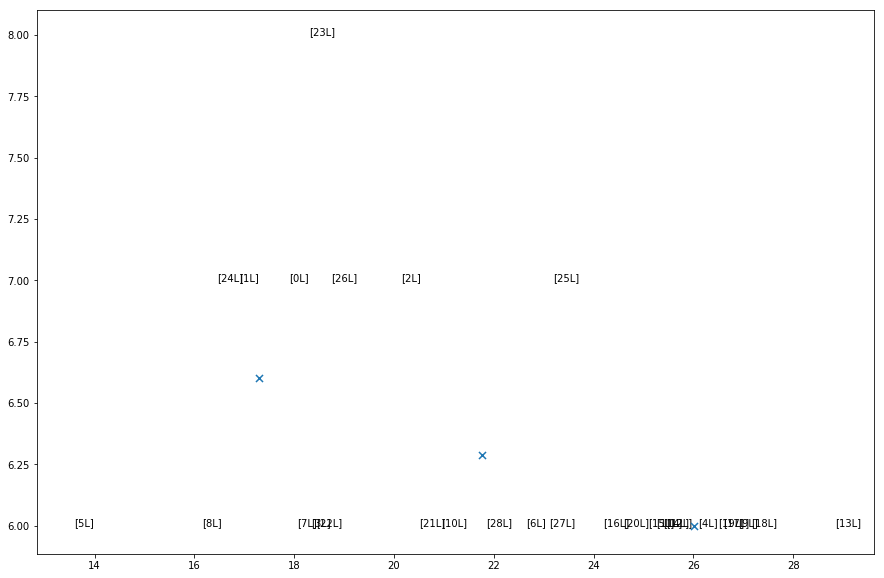

In [20]:
kmeans = KMeans(n_clusters=3) #Proses clustering
kmeans.fit(x)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

colors = ['g','r','b']

plt.figure(figsize=(15,10))

for i in range(len(x)):
    print('coordinate %s'%i, x[i], 'labels %s'%labels[i])
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize=10)
    list_cluster = dTable[(dTable['uas'] == x[i][0]) & (dTable['masa studi']== x[i][1])].index.tolist()
    plt.text(x[i][0], x[i][1], '%s' %(list_cluster))
    
plt.scatter(centroids[:, 0], centroids[:,1], marker = 'x', s=50, linewidths=5, zorder=10)
plt.show()